In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [0]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [0]:
df

,Day,Millons of pounds in sales
0,1,2.0
1,2,8.0
2,3,20.0
3,4,13.0
4,5,5.0
5,6,9.0
6,7,10.0
7,8,8.0
8,9,22.0
9,10,10.0


In [0]:
import random
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):
	# <---INSERT YOUR CODE HERE--->
	sample_array=np.zeros(shape=(n_iterations,sample_size),dtype=np.float64)
	# populating the array
	for i in range(0,n_iterations):
		for j in range(0,sample_size):
			rand_num=sample[random.randint(0,len(sample)-1)]
			sample_array[i][j]= rand_num
	
	#calculating mean
	data_mean_arr=[]
	for i in range(0,n_iterations):
		this_iteration=sample_array[i,:]
		data_mean_arr.append(this_iteration.mean())
		# print(this_iteration)
	data_mean_arr=np.sort(data_mean_arr)
	
	#calculating percentiles
	CI=95
	lower_per=(100-CI)/2
	upper_per=100-lower_per
	upper=np.percentile(data_mean_arr, upper_per)
	lower=np.percentile(data_mean_arr, lower_per)

	#clipping arrays 
	clip=len(data_mean_arr)*(lower_per/100)/2
	data_mean_arr=data_mean_arr[int(clip):-int(clip)]

	#calculating means
	data_mean=data_mean_arr.mean()

	return data_mean, lower, upper


(0, 40000)

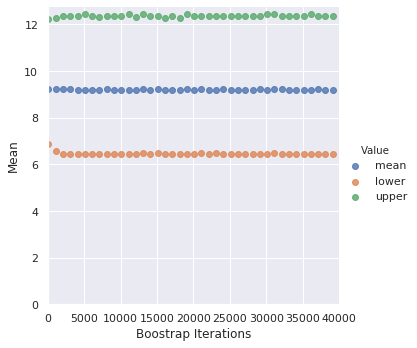

In [0]:
# Call your bootstrap function and plot the results

boots = []
iterations=40000
for i in range(100, iterations, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, iterations)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')




Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.



In [0]:
def boostrap_mean_ci(sample, sample_size, n_iterations, ci):
	sample_array=np.zeros(shape=(n_iterations,sample_size),dtype=np.float64)
	# print(sample_array)
	# populating the array
	for i in range(0,n_iterations):
		for j in range(0,sample_size):
			rand_num=sample[random.randint(0,len(sample)-1)]
			sample_array[i][j]= rand_num
	
	#calculating mean
	data_mean_arr=[]
	for i in range(0,n_iterations):
		this_iteration=sample_array[i,:]
		data_mean_arr.append(this_iteration.mean())
		# print(this_iteration)
	data_mean_arr=np.sort(data_mean_arr)
	
	#calculating percentiles
	# ci=95
	lower_per=(100-ci)/2
	upper_per=100-lower_per
	upper=np.percentile(data_mean_arr, upper_per)
	lower=np.percentile(data_mean_arr, lower_per)

	#clipping arrays 
	clip=len(data_mean_arr)*(lower_per/100)/2
	data_mean_arr=data_mean_arr[int(clip):-int(clip)]

	#calculating means
	data_mean=data_mean_arr.mean()	
	return data_mean, lower, upper


100%|██████████| 40/40 [00:22<00:00,  1.06s/it]


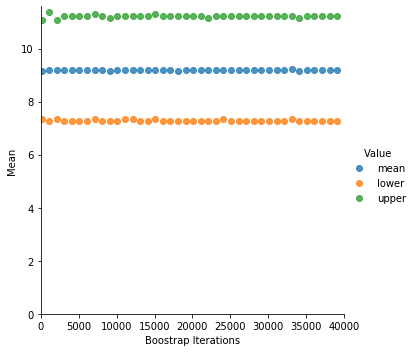

In [0]:
from tqdm import tqdm

boots = []
iterations=40000

for i in tqdm(range(100, iterations, 1000)):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, iterations)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed


In [0]:

df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv")
df

,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0
...,...,...
244,27,NaN
245,27,NaN
246,32,NaN
247,28,NaN


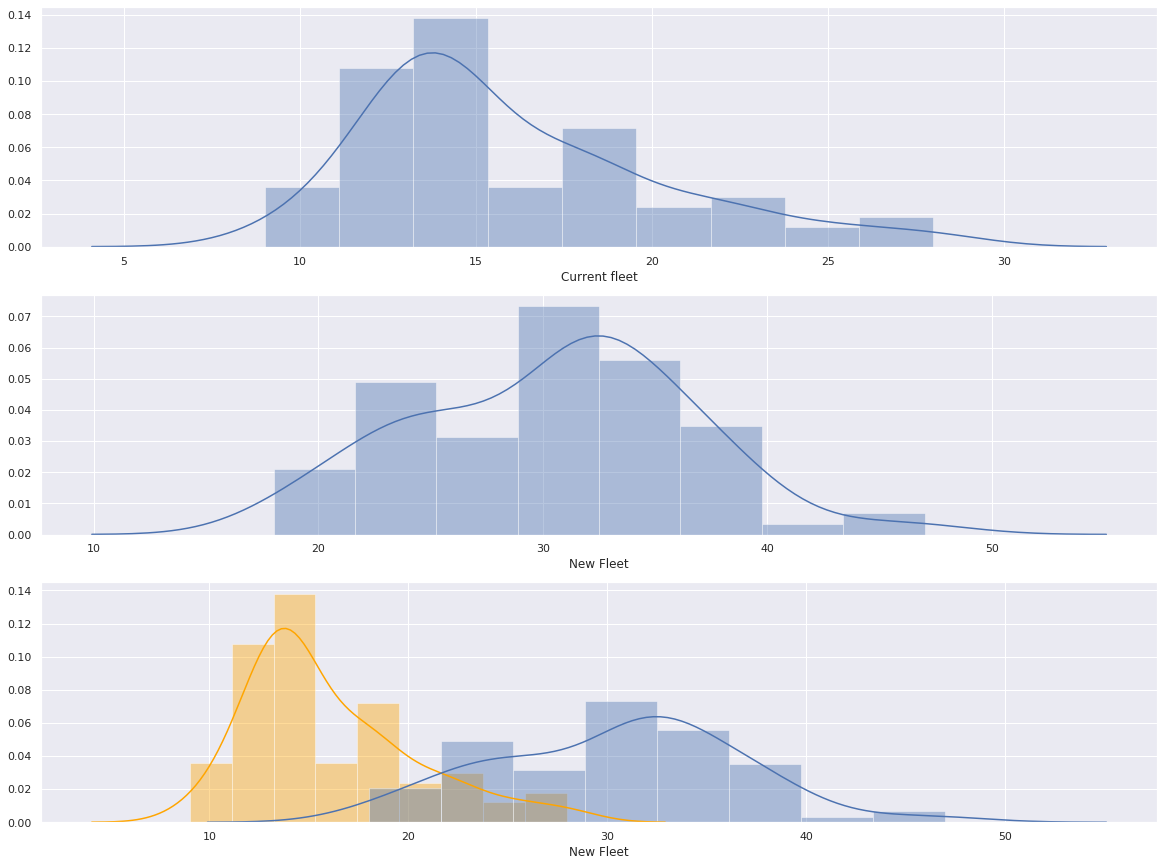

In [0]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# plt.figure(figsize=(25,10))
# ax = sns.distplot(df["Current fleet"],axlabel="Current fleet")
nans=df["New Fleet"].isna().sum()
plt.show()
# ax = sns.distplot(df["New Fleet"][:-nans],label="New Fleet")


fig, ax =plt.subplots(3,1)
fig.set_size_inches((20,15))
sns.distplot(df["Current fleet"][:-nans],axlabel="Current fleet",ax=ax[0])
sns.distplot(df["New Fleet"][:-nans],label="New Fleet",ax=ax[1])

sns.distplot(df["Current fleet"][:-nans],label="Current fleet",ax=ax[2],color='orange')
sns.distplot(df["New Fleet"][:-nans],label="New Fleet",ax=ax[2])

fig.show()




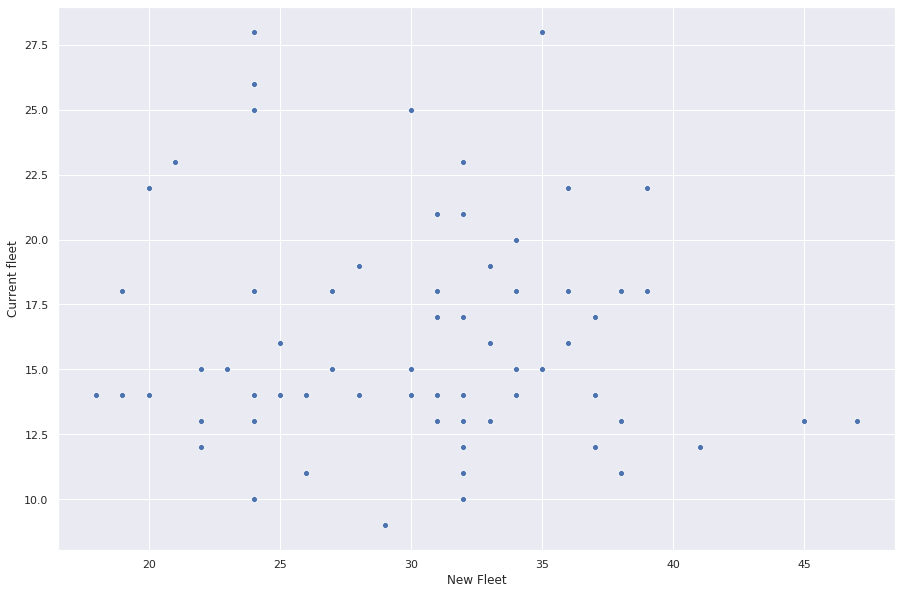

In [0]:

fig, ax =plt.subplots(1,1)
fig.set_size_inches((15,10))
sns.scatterplot(df["New Fleet"],df["Current fleet"],size_norm=20)
fig.show()

In [0]:
# Load and visualise the vehicles dataset
# <---INSERT YOUR CODE HERE--->

# Note: you can add more cells as needed to organise your code and your plots


In [0]:
# Compare the two fleets.
# You can create a permutation test function to do this. Check the lecture notes!


# 1. Calculate the mean of both samples.
# 2. Using the bootstrap function that you created:
    # - Find the upper and lower bound of the mean of the current fleet.
    # - Do the same with the new fleet.
    # - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)


In [0]:
nans=df["New Fleet"].isna().sum()
new_fleet=df.values.T[1][:-nans]
old_fleet=df.values.T[0][:-nans]

In [0]:
print("old mean =", old_fleet.mean(), " new mean = ",new_fleet.mean())

old mean = 16.025316455696203  new mean =  30.481012658227847


In [0]:
data_mean_new_fleet, lower_new_fleet, upper_new_fleet=boostrap_mean_ci(new_fleet, new_fleet.shape[0], 50000, 90)
data_mean_old_fleet, lower_old_fleet, upper_old_fleet=boostrap_mean_ci(old_fleet, old_fleet.shape[0], 50000, 90)

In [0]:
print("new=",data_mean_new_fleet, lower_new_fleet, upper_new_fleet)
print("old=",data_mean_old_fleet, lower_old_fleet, upper_old_fleet)

new= 30.479598667554963 29.354430379746834 31.60759493670886
old= 16.024964157228514 15.265822784810126 16.810126582278482


In [0]:
#null h0  : both are same
# h1  : new is better
sifnificance_level=0.05
def perm_test(n_iter,new_fleet,old_fleet):
    n=0
    t_obs=new_fleet.mean()-old_fleet.mean()
    t_obs
    for i in range(0,n_iter):
        merged = np.concatenate([new_fleet,old_fleet])
        # print(merged)
        np.random.shuffle(merged)
        # print(merged)


        pold=merged[:int(len(merged)/2)]
        pnew=merged[int(len(merged)/2):]

        tperm=pnew.mean()-pold.mean()
        if(tperm>t_obs):
            n+=1

    return n/n_iter


p_value=perm_test(1000,new_fleet,old_fleet)
# p_value=perm_test(1000,old_fleet,old_fleet) #just to check if it gives a value near to .50 if compared with the same dataset

print("p_value=",p_value)

if p_value>sifnificance_level:
    print("#null h0  : both are same")
else:
    print("# h1  : new is better")


p_value= 0.0
# h1  : new is better
